# Step 1: Problem Statement:
A bank wants to predict whether a loan applicant will default on their loan based on demographic and financial features such as age, education level, employment duration, income, and existing debts. 

In [1]:
%cd C:\Users\Vivek Chauhan\OneDrive\Desktop\AnalytixLabs

C:\Users\Vivek Chauhan\OneDrive\Desktop\AnalytixLabs


# Step 2: Load data and important libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
bank_loan = pd.read_csv("bankloans.csv")

In [4]:
bank_loan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [ ]:
'''
About the columns 
age      Age of the applicant
ed       Education level (Education level:1 = No High School ,2 = High School Graduate, 3 = College Graduate4 = Postgraduate or higher)
employ   Years employed
address  Likely years at current address (proxy for stability)
income   Annual income
debtinc  Debt-to-income ratio (%)
creddebt Credit card or revolving debt
othdebt  Other debt (possibly loans, EMI, etc.)
default  Target variable (1 = defaulted, 0 = paid)

'''

# Step 3: EDA  

In [5]:
# missing value

In [6]:
bank_loan.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [7]:
# there is no missing value, 
# but these missing values in default we have to predict 

In [8]:
# Duplicate values

In [9]:
bank_loan.duplicated().sum()

0

In [10]:
# Outlier Treatment

<AxesSubplot:>

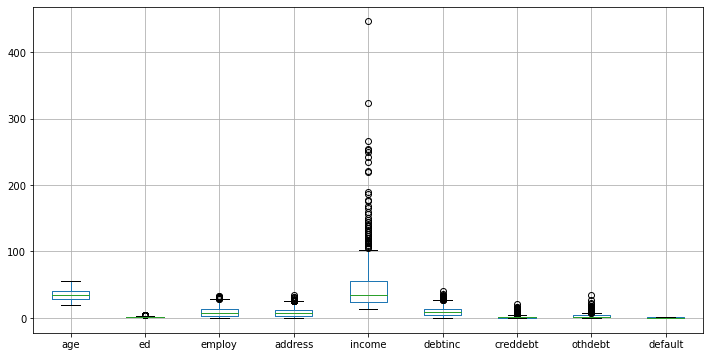

In [11]:
bank_loan.boxplot(figsize = (12,6))

In [15]:
# no outlier treatment required 

# Step 4 : Training the Model

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
bank_loan.shape

(850, 9)

In [18]:
loan1 = bank_loan[bank_loan["default"].notna()]

In [19]:
loan1.shape

(700, 9)

In [20]:
loan2 = bank_loan[bank_loan["default"].isna()]

In [21]:
loan2.shape

(150, 9)

In [26]:
x = loan1.drop(["default"], axis = 1)

In [27]:
y = loan1["default"]

In [28]:
print(x.shape)
print(y.shape)

(700, 8)
(700,)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

# Feature Scaling 

In [30]:
scaler = StandardScaler()

In [32]:
x_train_scaled = scaler.fit_transform(x_train)

In [33]:
x_test_scaled = scaler.transform(x_test)

# Checking the class Imbalance 

In [34]:
y.value_counts()

0.0    517
1.0    183
Name: default, dtype: int64


# Address the Class imbalance

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state = 2)

# Apply Smote

In [37]:
x_train_scaled_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

In [38]:
print("After SMOTE:\n", y_train_smote.value_counts())

After SMOTE:
 0.0    414
1.0    414
Name: default, dtype: int64


# Step 7: Train the Model SVC 

In [40]:
model = SVC(kernel = "rbf", C = 1.0, gamma = "scale", random_state = 3)

In [41]:
model.fit(x_train_scaled_smote, y_train_smote)

SVC(random_state=3)

In [42]:
y_pred = model.predict(x_test_scaled)

In [43]:
accuracy_after_resampled_svc = accuracy_score(y_pred, y_test)
print(accuracy_after_resampled_svc)

0.7857142857142857


In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84        87
         1.0       0.81      0.57      0.67        53

    accuracy                           0.79       140
   macro avg       0.79      0.74      0.75       140
weighted avg       0.79      0.79      0.78       140



# We have to predict the default values in loan2

In [45]:
x2 = loan2.drop("default", axis = 1)

In [46]:
x2_scaled = scaler.transform(x2)

In [47]:
predicted_default_values = model.predict(x2_scaled)

In [48]:
predicted_default_values = pd.DataFrame(predicted_default_values, columns = ["default"])

In [49]:
final_loan_default_pred = pd.concat([x2.reset_index(drop=True), predicted_default_values.reset_index(drop=True)], axis=1)

# Saving the predicted default value as csv file for the report 

In [50]:
final_loan_default_pred.to_csv("final_loan_default_pred.csv", index = False)

In [52]:
final_loan_default_pred.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,36,1,16,13,32,10.9,0.544128,2.943872,0.0
1,50,1,6,27,21,12.9,1.316574,1.392426,0.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,0.0


# Saving the Model

In [53]:
import pickle

In [54]:
# Define the path
save_path = r"C:\Users\Vivek Chauhan\OneDrive\Desktop\ML\bankloan\bankloan_default.pkl"

# Save the model
with open(save_path, "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


# Checking the Saved Model will be working or not 

In [56]:
# Load the model
model_path = r"C:\Users\Vivek Chauhan\OneDrive\Desktop\ML\bankloan\bankloan_default.pkl"
with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

In [57]:
# Example sample: [age, ed, employ, address, income, debtinc, creddebt, othdebt]
sample_data = np.array([[35, 2, 10, 5, 60, 10.5, 2.0, 3.5]])


In [58]:
# IMPORTANT: Apply same preprocessing if your model was trained with scaling!
# For now assuming raw input works. If you used StandardScaler earlier, reuse the scaler:
# sample_data = scaler.transform(sample_data)

# Predict
prediction = loaded_model.predict(sample_data)



In [59]:
# Output
print("Prediction:", "Default" if prediction[0] == 1.0 else "No Default")


Prediction: No Default
